### MNIST
### DataLoader, Transformation
### Multilayer Neural Net, activation function
### Loss and Optimizer
### Training loop (batch training)
### Model Evaluation
### GPU Support

torch.Size([100, 1, 28, 28]) torch.Size([100])


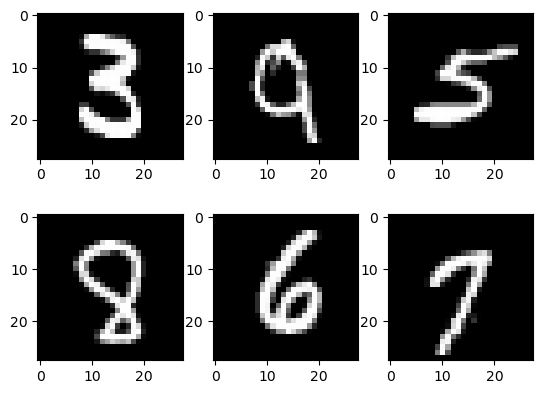

In [42]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784            # 28x28=784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# import MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                        transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                        transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# example data
samples, labels = next(iter(train_loader))
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')

plt.show()


torch.Size([100, 1, 28, 28])

100: batch_size
1: one channel (RGB: three channel)
28 x 28 size

In [43]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)

        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, lables) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        # reshape
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, lables)

        # backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%100 == 0:
            print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss={loss.item():.4f}")


epoch 1/2, step 100/600, loss=0.4049
epoch 1/2, step 200/600, loss=0.2972
epoch 1/2, step 300/600, loss=0.3122
epoch 1/2, step 400/600, loss=0.1692
epoch 1/2, step 500/600, loss=0.1727
epoch 1/2, step 600/600, loss=0.2912
epoch 2/2, step 100/600, loss=0.3792
epoch 2/2, step 200/600, loss=0.1952
epoch 2/2, step 300/600, loss=0.1859
epoch 2/2, step 400/600, loss=0.2057
epoch 2/2, step 500/600, loss=0.1256
epoch 2/2, step 600/600, loss=0.1458


In [53]:
# test code
# 이거는 왜 안되지...????
# with torch.no_grad():
#     n_correct = 0
#     n_samples = 0

#     for images, labels in test_loader:
#         images = images.reshape(-1, 28*28).to(device)
#         labels = labels.to(device)
#         outputs = model(images)

#         # value, index
#         _, predicted = torch.max(outputs.data, 1)

#         n_samples += labels.size(0)
#         n_correct += (predicted == lables).sum().item()

#     print(n_correct)
#     print(n_samples)
#     acc = 100.0 * n_correct / n_samples
#     print(f"accuracy={acc}")

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0

    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
    print(n_correct)
    print(n_samples)
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

9522
10000
Accuracy of the network on the 10000 test images: 95.22 %
